In [1]:
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
%pip install "numpy<1.24"
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
pd.options.mode.chained_assignment = None  # default='warn'


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('data/bc/wdbc.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.drop("Unnamed: 32", axis=1, inplace=True)
df.drop('id',axis=1, inplace=True)
print(df.shape)
df.describe()

(569, 31)


radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

map the diagnossis to binary (M = malignant, B = benign)

In [5]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Visualization


B    357
M    212
Name: diagnosis, dtype: int64


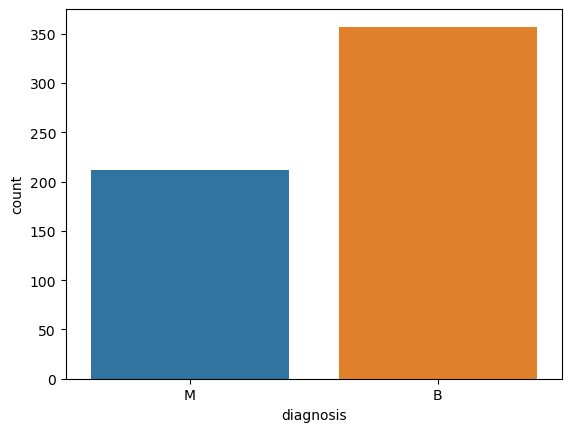

In [6]:
print(df['diagnosis'].value_counts())
sns.countplot(x = 'diagnosis', data=df)
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})


we can observe from the heatmap that there are many correlations in the dataset


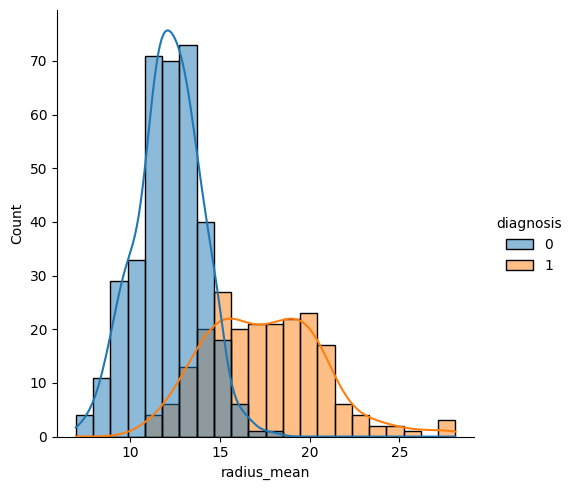

In [10]:
sns.displot(df, x= 'radius_mean', hue='diagnosis', kde=True)

In [11]:
df.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

<Axes: >

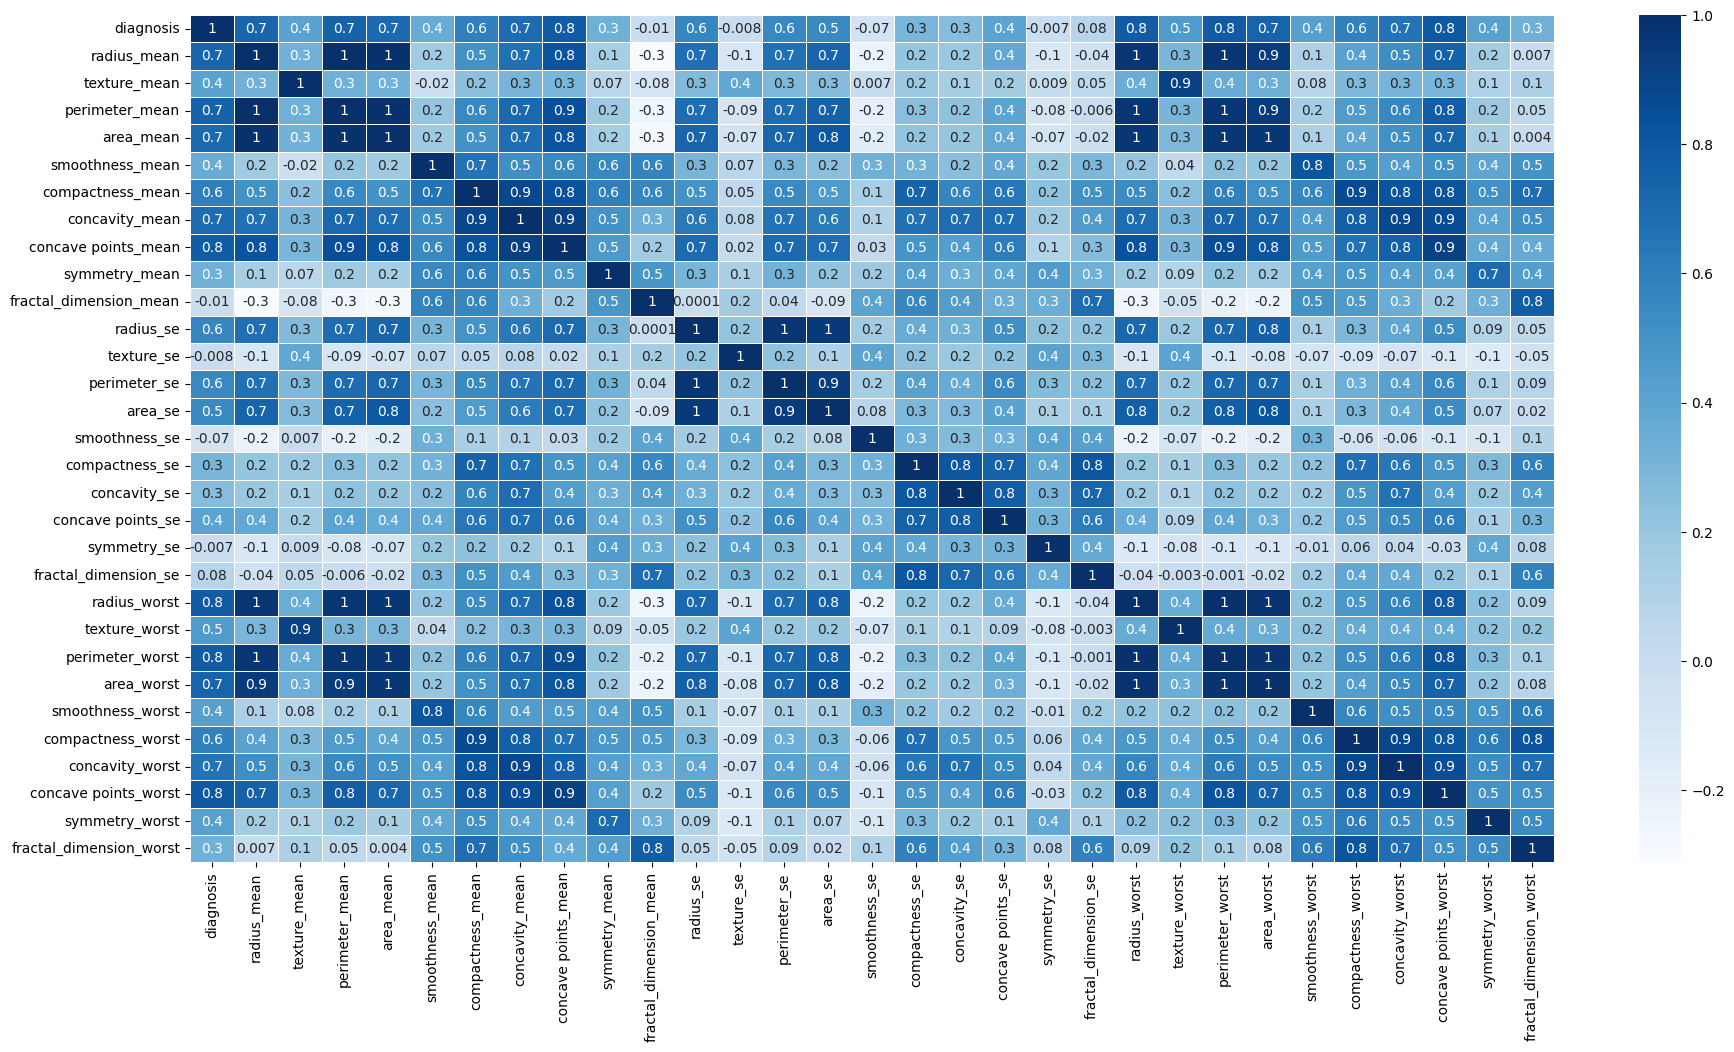

In [17]:
plt.figure(figsize=(22, 11))
#sns.heatmap(df.corr(), cmap='Blues')
sns.heatmap(df.corr(), cmap='Blues', annot=True, linewidth=.5, fmt='.1g')


In [9]:
#getting Mean columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

#getting Se columns with diagnosis
s_col= ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

#getting Worst column with diagnosis
w_col=['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']


Pairplot for mean columns


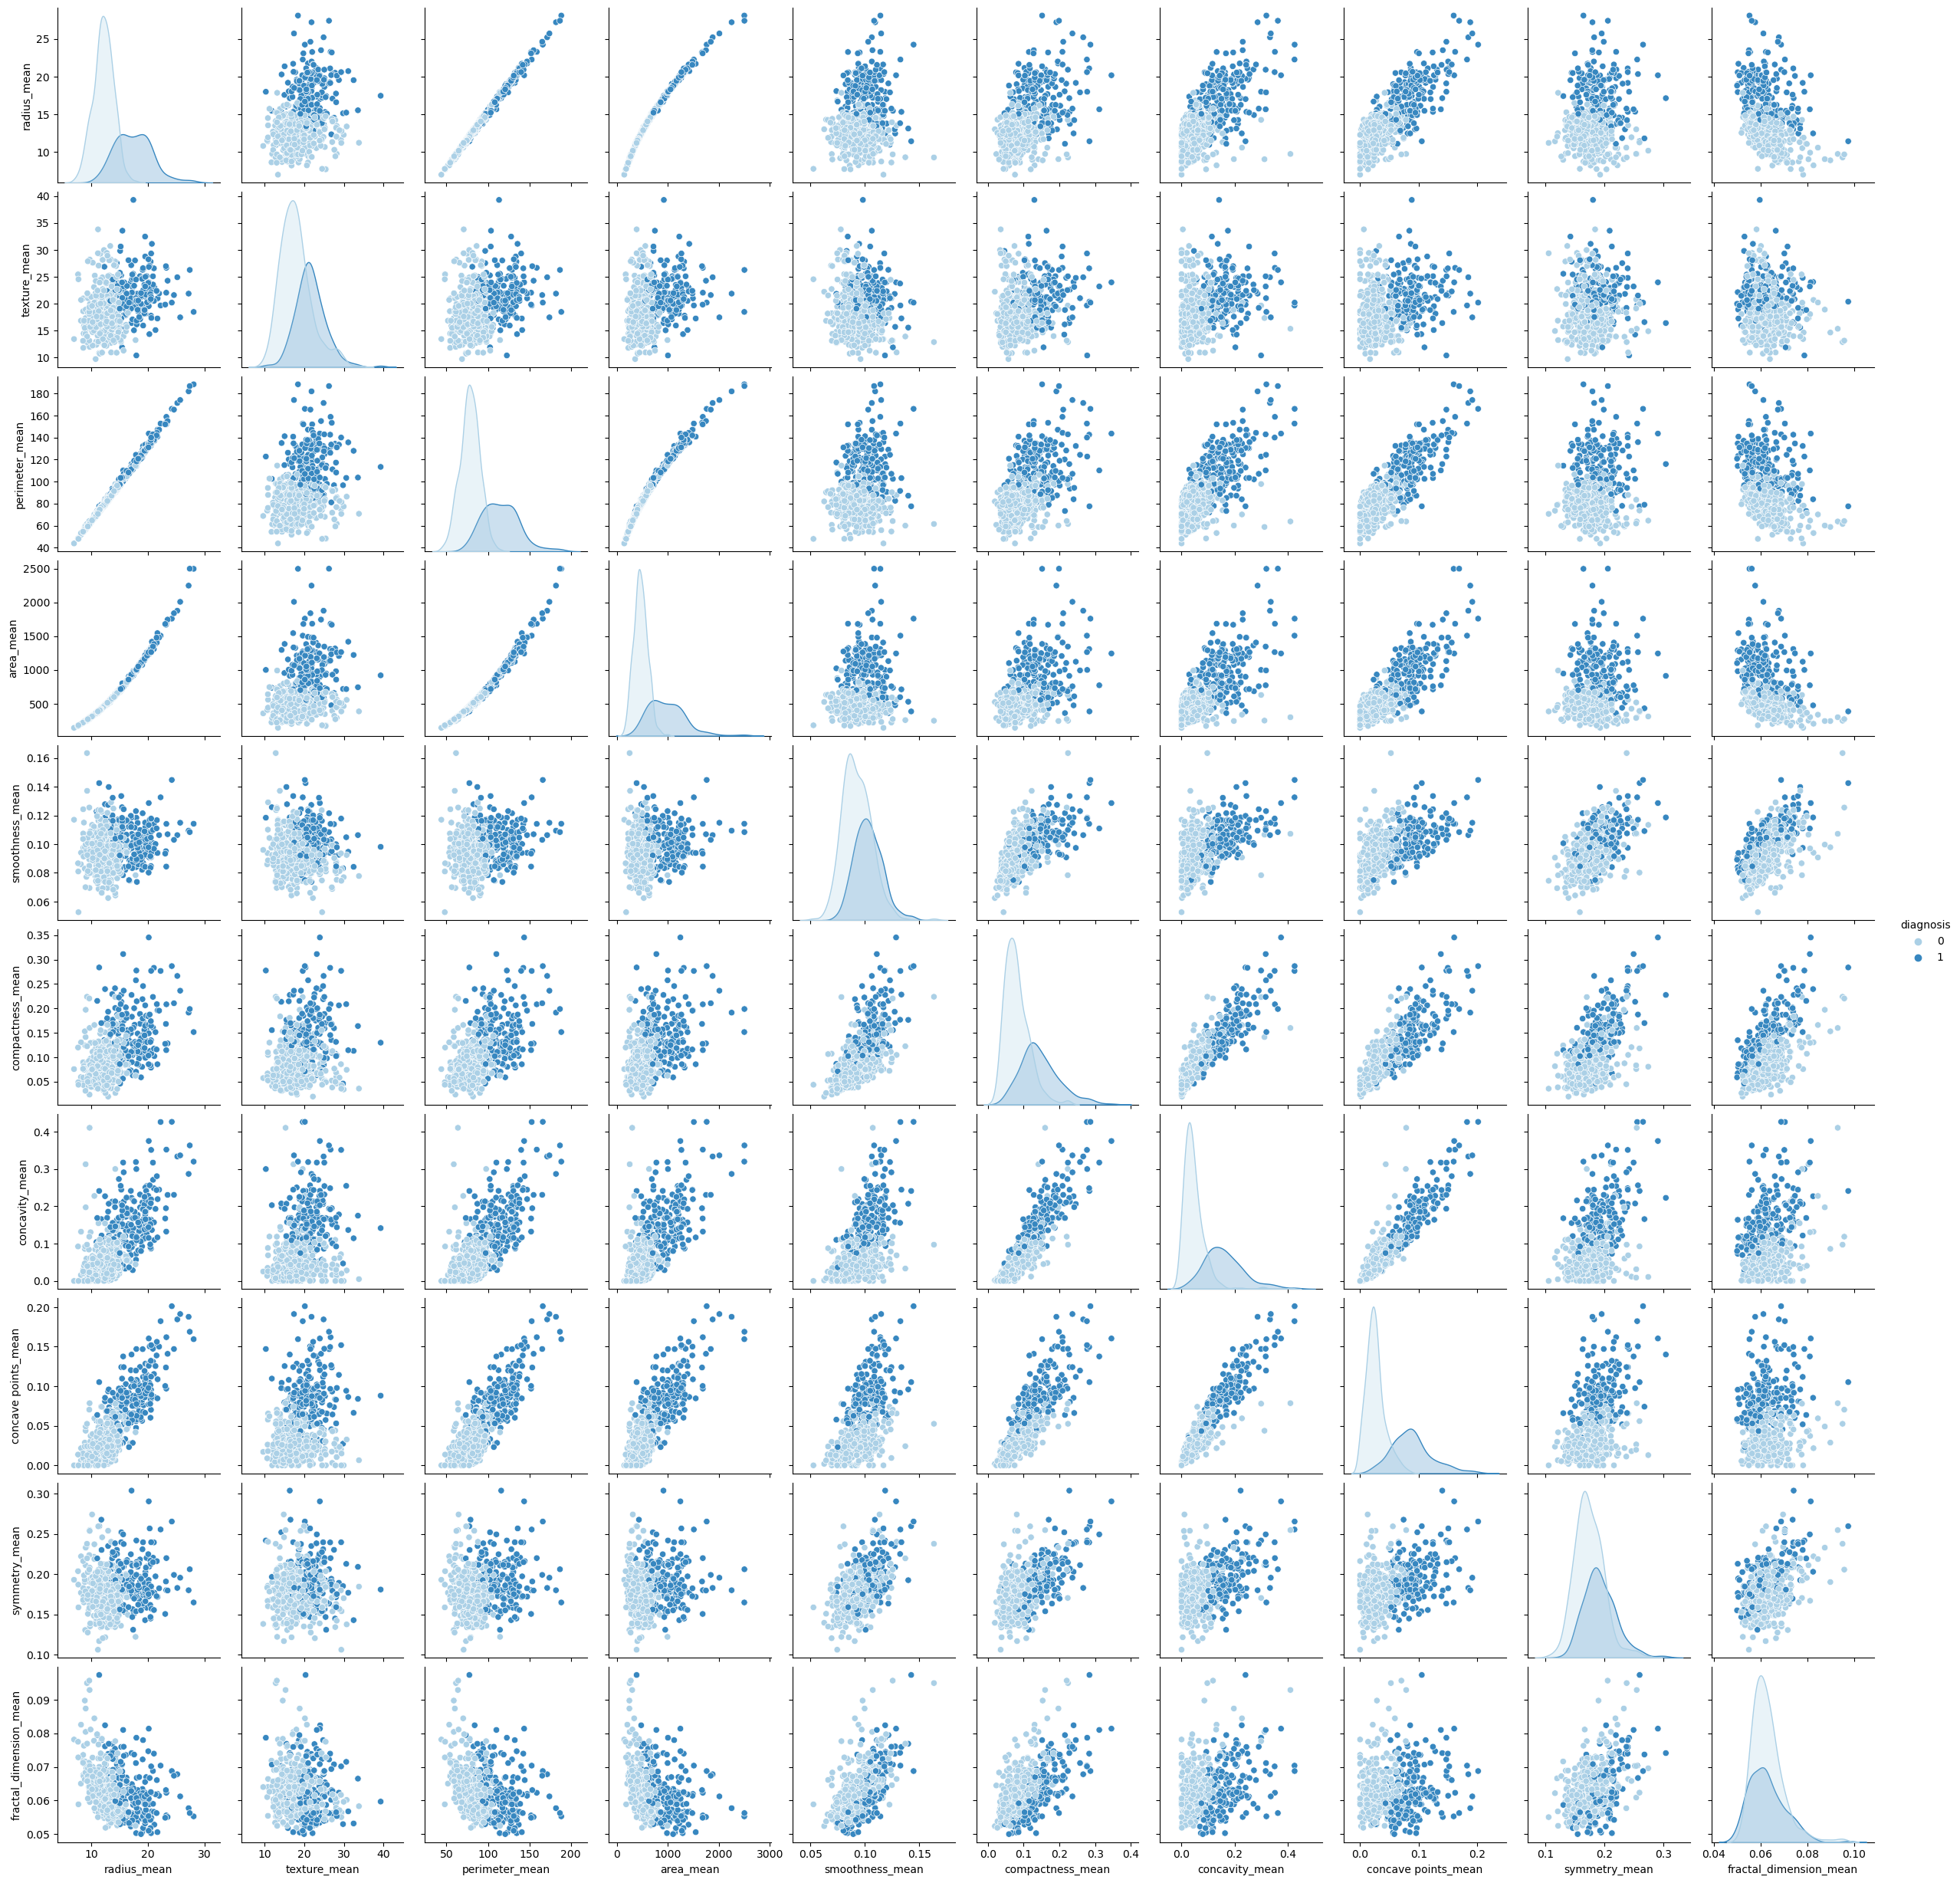

In [13]:
sns.pairplot(df[m_col], hue='diagnosis', palette='Blues')


Pairplot for SE columns


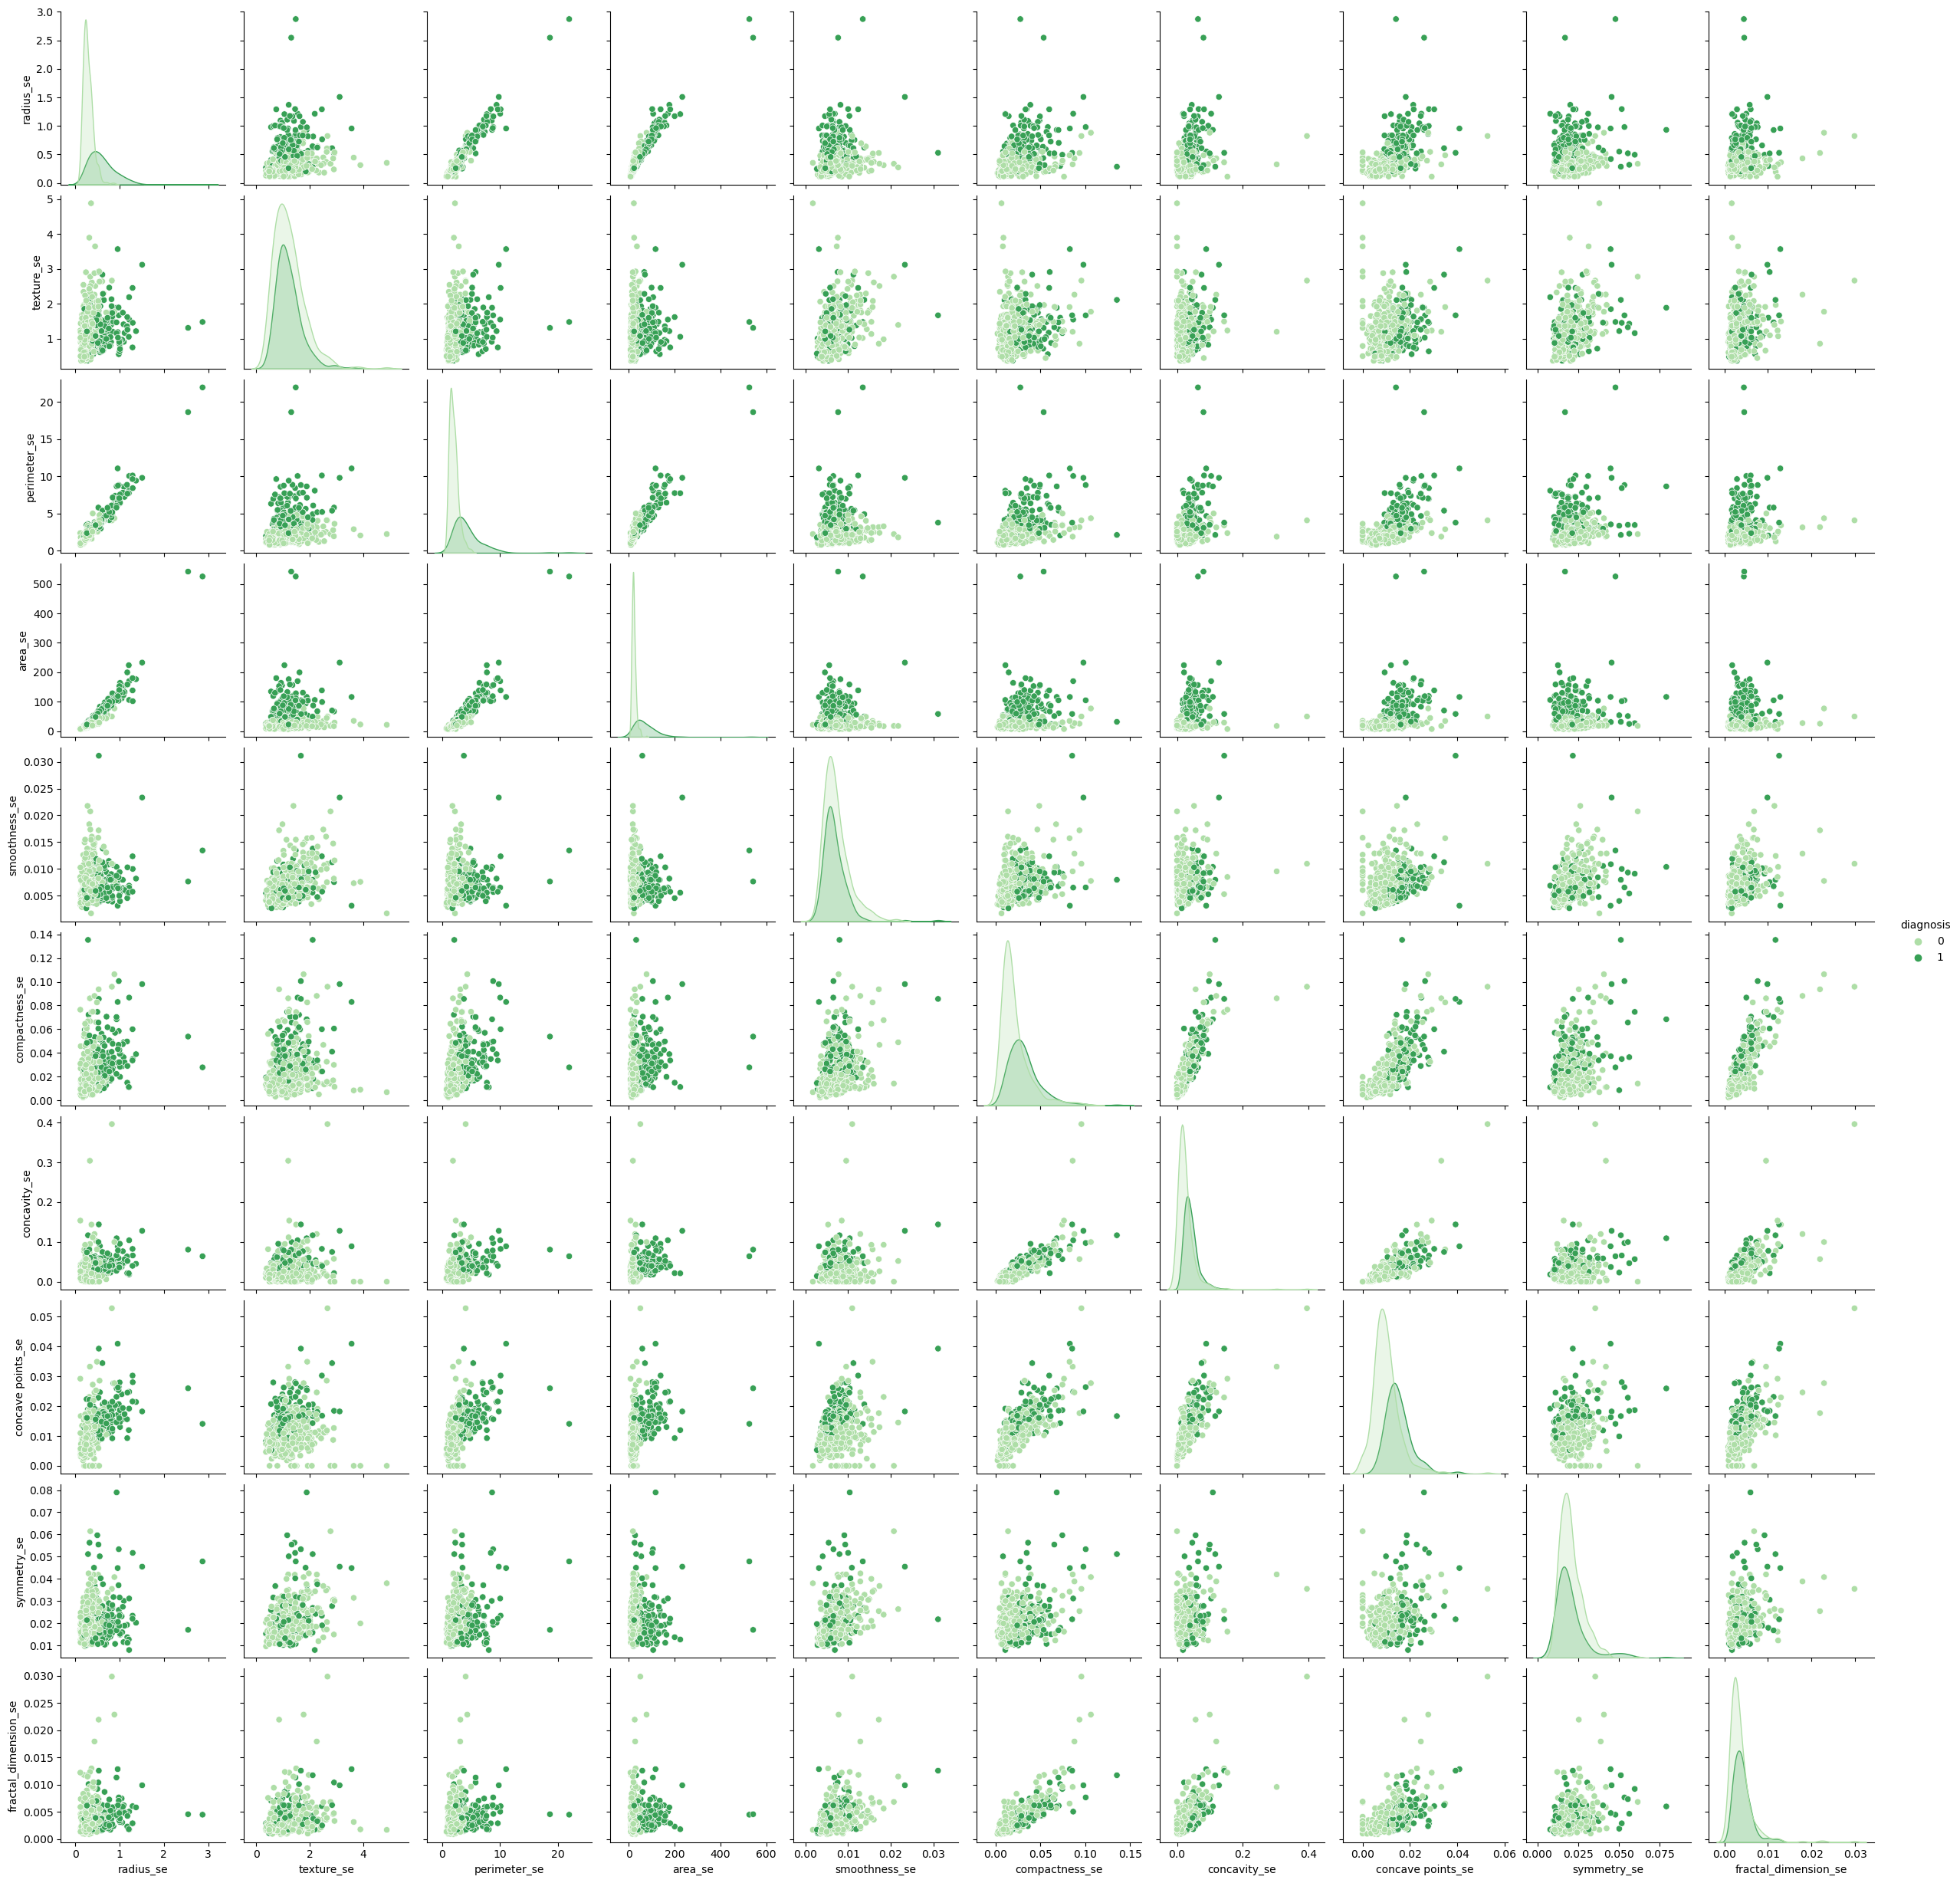

In [11]:
sns.pairplot(df[s_col],hue='diagnosis',palette='Greens')

Pairplot for worst columns

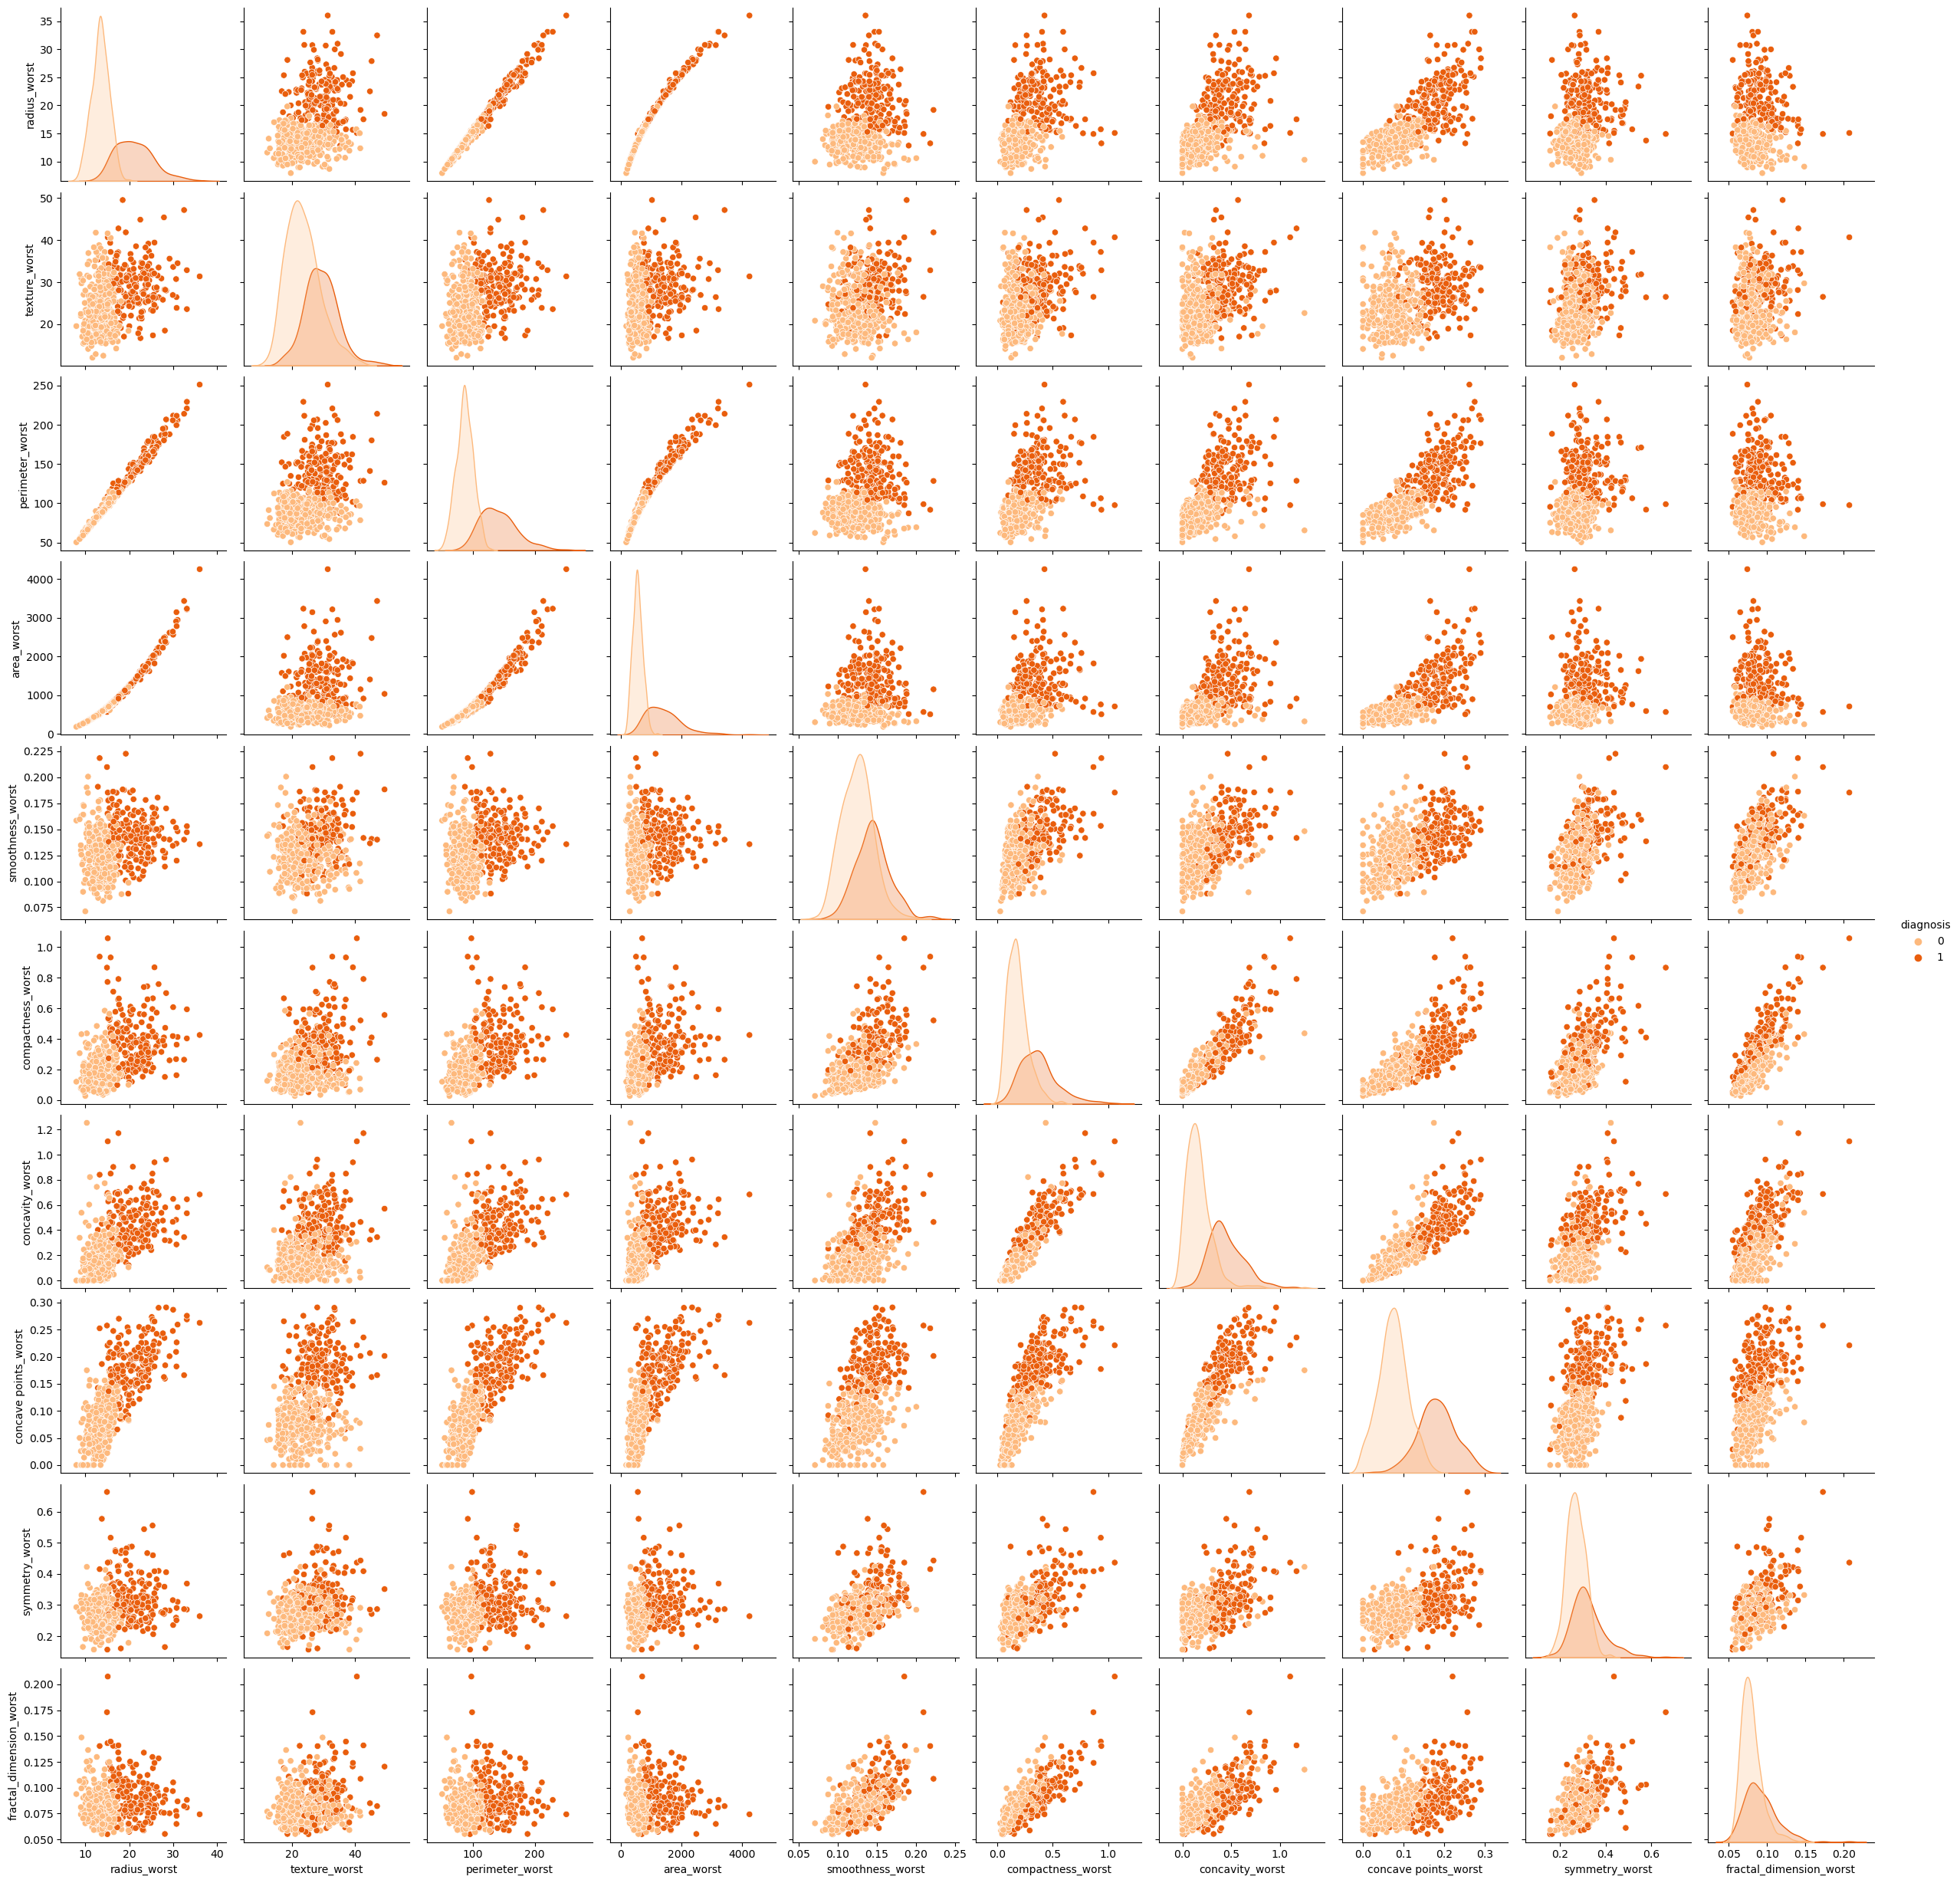

In [12]:
sns.pairplot(df[w_col],hue='diagnosis',palette='Oranges')


### Data Processing 

In [7]:
rng = np.random.RandomState(42)

def add_missing_values(X_full, y_full, missing_rate=0.95):
    n_samples, n_features = X_full.shape    
    n_missing_samples = int(n_samples * n_features * missing_rate)

    missing_samples = rng.randint(low=0, high=n_samples * n_features, size=n_missing_samples)
    

    X_missing = X_full.copy(deep=True)
    
    for val in missing_samples:
        #print(val // n_features, val % n_features)
        X_missing.iloc[val // n_features][val % n_features] = np.nan
    
    
    y_missing = y_full.copy(deep=True)
    #print(X_missing.isnull().sum())

    return X_missing, y_missing


In [8]:
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [9]:
X_missing_95, _ = add_missing_values(X_train, y_train, missing_rate=0.05)
X_missing_90, _ = add_missing_values(X_train, y_train, missing_rate=0.10)
X_missing_85, _ = add_missing_values(X_train, y_train, missing_rate=0.15)

# Inputting missing values


In [10]:
# 1 Mean 
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean') #for median imputation replace 'mean' with 'median'

imp_mean.fit(X_missing_95)
X_missing_95_mean = pd.DataFrame(imp_mean.fit_transform(X_missing_95), columns = X_missing_95.columns)
#X_missing_95_mean.drop('diagnosis',axis=1, inplace=True)


imp_mean.fit(X_missing_90)
X_missing_90_mean = pd.DataFrame(imp_mean.fit_transform(X_missing_90), columns = X_missing_90.columns)
#X_missing_90_mean.drop('diagnosis',axis=1, inplace=True)

imp_mean.fit(X_missing_85)
X_missing_85_mean = pd.DataFrame(imp_mean.fit_transform(X_missing_85), columns = X_missing_85.columns)
#X_missing_85_mean.drop('diagnosis',axis=1, inplace=True)


In [12]:
# 2 KNN
import sys
%pip install impyute
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imp_mean.fit(X_missing_95)
X_missing_95_knn = pd.DataFrame(fast_knn(X_missing_85.values, k=10), columns = X_missing_95.columns)
#X_missing_95_knn.drop('diagnosis',axis=1, inplace=True)


imp_mean.fit(X_missing_90)
X_missing_90_knn = pd.DataFrame(fast_knn(X_missing_85.values, k=10), columns = X_missing_90.columns)
#X_missing_90_knn.drop('diagnosis',axis=1, inplace=True)

imp_mean.fit(X_missing_85)
X_missing_85_knn = pd.DataFrame(fast_knn(X_missing_85.values, k=10), columns = X_missing_85.columns)
#X_missing_85_knn.drop('diagnosis',axis=1, inplace=True)



Note: you may need to restart the kernel to use updated packages.


## Model building

### Random forest

In [13]:
for i in range(50, 450, 50):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    predictions4 = rfc.predict(X_test)
    rfc_acc = accuracy_score(y_test, predictions4)
    print(f"[{i}]Accuracy of Random Forests Model is: ", rfc_acc)

[50]Accuracy of Random Forests Model is:  0.9649122807017544
[100]Accuracy of Random Forests Model is:  0.956140350877193
[150]Accuracy of Random Forests Model is:  0.9649122807017544
[200]Accuracy of Random Forests Model is:  0.956140350877193
[250]Accuracy of Random Forests Model is:  0.9649122807017544
[300]Accuracy of Random Forests Model is:  0.9649122807017544
[350]Accuracy of Random Forests Model is:  0.9649122807017544
[400]Accuracy of Random Forests Model is:  0.9649122807017544


In [14]:
rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_train, y_train)
predictions4 = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, predictions4)
print("Accuracy of Random Forests Model is: ", rfc_acc)

Accuracy of Random Forests Model is:  0.9649122807017544


Note: you may need to restart the kernel to use updated packages.


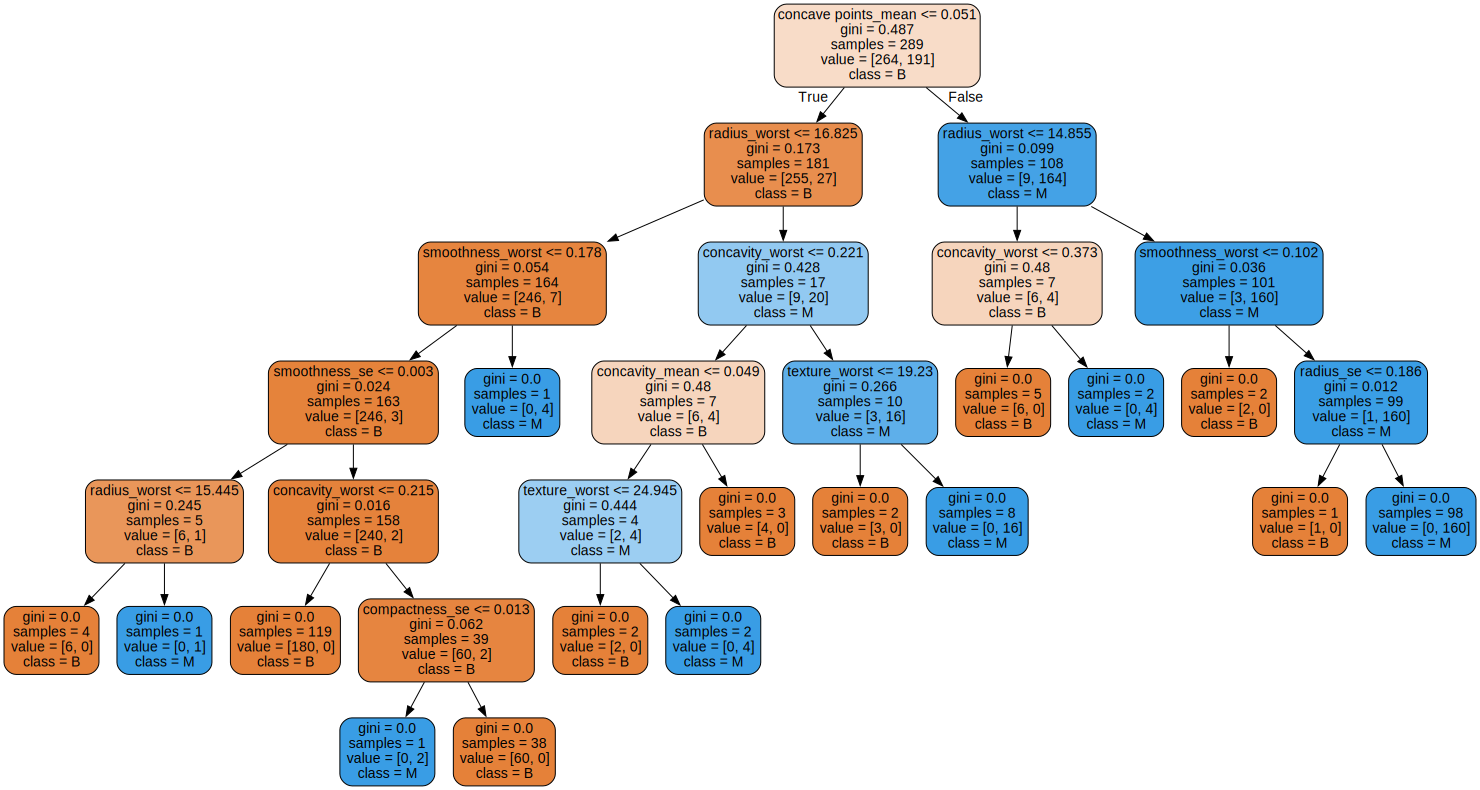

In [15]:
%pip install graphviz
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(rfc.estimators_[99], 
                           feature_names=X_train.columns,
                           class_names=['B', 'M'],
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

In [26]:
rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, predictions)
print("[100%]Accuracy of Random Forests Model is: ", rfc_acc)


X_missing_95['diagnosis'] = y_train
t = X_missing_95.dropna()
y = t['diagnosis']
t.drop('diagnosis', axis=1, inplace=True)

rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(t, y)
predictions2 = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, predictions2)
print("[095%]Accuracy of Random Forests Model is: ", rfc_acc)


X_missing_90['diagnosis'] = y_train
t = X_missing_90.dropna()
y = t['diagnosis']
t.drop('diagnosis', axis=1, inplace=True)

rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(t, y)
predictions3 = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, predictions3)
print("[090%]Accuracy of Random Forests Model is: ", rfc_acc)


X_missing_85['diagnosis'] = y_train
t = X_missing_85.dropna()
y = t['diagnosis']
t.drop('diagnosis', axis=1, inplace=True)

rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(t, y)
predictions4 = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, predictions4)
print("[085%]Accuracy of Random Forests Model is: ", rfc_acc)

print("Mean")

##################################################


rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_missing_95_mean, y_train)
predictions = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, predictions)
print("[095%]Accuracy of Random Forests Model is: ", rfc_acc)

rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_missing_90_mean, y_train)
predictions = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, predictions)
print("[090%]Accuracy of Random Forests Model is: ", rfc_acc)

rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_missing_85_mean, y_train)
predictions = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, predictions)
print("[085%]Accuracy of Random Forests Model is: ", rfc_acc)


print("KNN")

rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_missing_95_knn, y_train)
predictions = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, predictions)
print("[095%]Accuracy of Random Forests Model is: ", rfc_acc)

rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_missing_90_knn, y_train)
predictions = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, predictions)
print("[090%]Accuracy of Random Forests Model is: ", rfc_acc)

rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_missing_85_knn, y_train)
predictions = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, predictions)
print("[085%]Accuracy of Random Forests Model is: ", rfc_acc)







[100%]Accuracy of Random Forests Model is:  0.9649122807017544
[095%]Accuracy of Random Forests Model is:  0.9649122807017544
[090%]Accuracy of Random Forests Model is:  0.9473684210526315
[085%]Accuracy of Random Forests Model is:  0.9122807017543859
Mean
[095%]Accuracy of Random Forests Model is:  0.9649122807017544
[090%]Accuracy of Random Forests Model is:  0.956140350877193
[085%]Accuracy of Random Forests Model is:  0.956140350877193
KNN
[095%]Accuracy of Random Forests Model is:  0.9649122807017544
[090%]Accuracy of Random Forests Model is:  0.9649122807017544
[085%]Accuracy of Random Forests Model is:  0.9649122807017544


## Best and worst model

Text(50.722222222222214, 0.5, 'y_true')

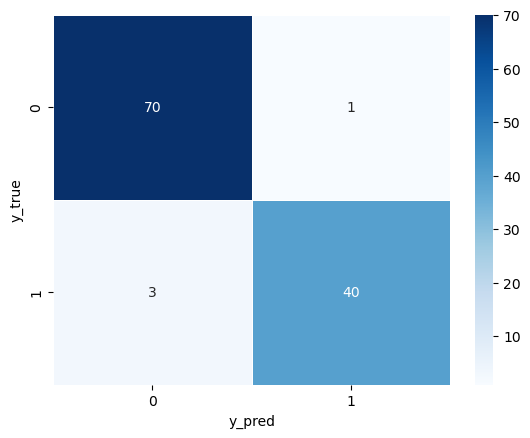

In [29]:
cm = confusion_matrix(y_test, predictions)
ax= plt.subplot()
sns.heatmap(cm, annot = True, linewidths = 0.5, cmap='Blues', fmt =".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")

Text(50.722222222222214, 0.5, 'y_true')

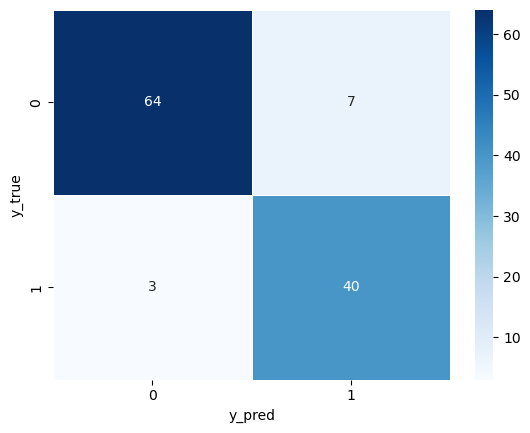

In [30]:
cm = confusion_matrix(y_test, predictions4)
ax= plt.subplot()
sns.heatmap(cm, annot = True, linewidths = 0.5, cmap='Blues', fmt =".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")

### SVM

In [31]:
# missing mean knn

print("Skip missing")

svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, y_train)
predictions5 = svc_model.predict(X_test)
svm_acc = accuracy_score(y_test, predictions5)
print("[100%]Accuracy of SVM model is: ", svm_acc)


X_missing_95['diagnosis'] = y_train
t = X_missing_95.dropna()
y = t['diagnosis']
t.drop('diagnosis', axis=1, inplace=True)

svc_model = SVC(kernel="rbf")
svc_model.fit(t, y)
predictions5 = svc_model.predict(X_test)
svm_acc = accuracy_score(y_test, predictions5)
print("[095%]Accuracy of SVM model is: ", svm_acc)



X_missing_90['diagnosis'] = y_train
t = X_missing_90.dropna()
y = t['diagnosis']
t.drop('diagnosis', axis=1, inplace=True)

svc_model = SVC(kernel="rbf")
svc_model.fit(t, y)
predictions5 = svc_model.predict(X_test)
svm_acc = accuracy_score(y_test, predictions5)
print("[090%]Accuracy of SVM model is: ", svm_acc)

X_missing_85['diagnosis'] = y_train
t = X_missing_85.dropna()
y = t['diagnosis']
t.drop('diagnosis', axis=1, inplace=True)

svc_model = SVC(kernel="rbf")
svc_model.fit(t, y)
predictions5 = svc_model.predict(X_test)
svm_acc = accuracy_score(y_test, predictions5)
print("[085%]Accuracy of SVM model is: ", svm_acc)




print("Mean")

svc_model = SVC(kernel="rbf")
svc_model.fit(X_missing_95_mean, y_train)
predictions5 = svc_model.predict(X_test)
svm_acc = accuracy_score(y_test, predictions5)
print("[095%]Accuracy of SVM model is: ", svm_acc)

svc_model = SVC(kernel="rbf")
svc_model.fit(X_missing_90_mean, y_train)
predictions5 = svc_model.predict(X_test)
svm_acc = accuracy_score(y_test, predictions5)
print("[090%]Accuracy of SVM model is: ", svm_acc)

svc_model = SVC(kernel="rbf")
svc_model.fit(X_missing_85_mean, y_train)
predictions5 = svc_model.predict(X_test)
svm_acc = accuracy_score(y_test, predictions5)
print("[085%]Accuracy of SVM model is: ", svm_acc)

print("KNN")

svc_model = SVC(kernel="rbf")
svc_model.fit(X_missing_95_knn, y_train)
predictions5 = svc_model.predict(X_test)
svm_acc = accuracy_score(y_test, predictions5)
print("[095%]Accuracy of SVM model is: ", svm_acc)

svc_model = SVC(kernel="rbf")
svc_model.fit(X_missing_90_knn, y_train)
predictions5 = svc_model.predict(X_test)
svm_acc = accuracy_score(y_test, predictions5)
print("[090%]Accuracy of SVM model is: ", svm_acc)

svc_model = SVC(kernel="rbf")
svc_model.fit(X_missing_85_knn, y_train)
predictions5 = svc_model.predict(X_test)
svm_acc = accuracy_score(y_test, predictions5)
print("[085%]Accuracy of SVM model is: ", svm_acc)








Skip missing
[100%]Accuracy of SVM model is:  0.9473684210526315
[095%]Accuracy of SVM model is:  0.9385964912280702
[090%]Accuracy of SVM model is:  0.8771929824561403
[085%]Accuracy of SVM model is:  0.7719298245614035
Mean
[095%]Accuracy of SVM model is:  0.9473684210526315
[090%]Accuracy of SVM model is:  0.9473684210526315
[085%]Accuracy of SVM model is:  0.9473684210526315
KNN
[095%]Accuracy of SVM model is:  0.9473684210526315
[090%]Accuracy of SVM model is:  0.9473684210526315
[085%]Accuracy of SVM model is:  0.9473684210526315
